In [2]:
import numpy as np
from scipy.ndimage import shift
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
sys.path.insert(0, '/home/sudat/athena/vis/python')
import athena_read

In [2]:
datap1 = np.genfromtxt(f'/home/sudat/cca/fixed/single_fixed/disk.hst')
data2p1 = athena_read.athdf(f'/home/sudat/cca/fixed/single_fixed/disk.out1.00800.athdf')
timep1 = datap1[:,0] / (2*np.pi)
#sum_torquep1 = datap1[:,10]

densp1 = data2p1.get('dens')[0]
rp1 = data2p1.get('x1v')
phip1 = data2p1.get('x2v')
time2p1 = data2p1.get('Time')
phip1_c = data2p1.get('x2f')
rp1_c = data2p1.get('x1f')

phip1 = phip1[:,None]
d_phip1 = phip1_c[:, None]
d_phip1 = d_phip1[1:] - d_phip1[:-1]
d_rp1 = rp1_c[1:] - rp1_c[:-1]

In [3]:
data = np.genfromtxt('/home/sudat/cca/fixed/jupiter-jupiter/a1d5_fixed/disk.hst')
data2 = athena_read.athdf('/home/sudat/cca/fixed/jupiter-jupiter/a3_fixed/disk.out1.00720.athdf')
time = data[:,0] / (2*np.pi)
#sum_torque = data[:,10]
#sum_torque2 = data[:,11]

dens = data2.get('dens')[0]
r = data2.get('x1v')
phi = data2.get('x2v')
time2 = data2.get('Time')
phi_c= data2.get('x2f')
r_c = data2.get('x1f')

phi = phi[:,None]
d_phi = phi_c[:, None]
d_phi = d_phi[1:] - d_phi[:-1]
d_r = r_c[1:] - r_c[:-1]

In [4]:
#Orbital distance of Planet 1 and Planet 2
p_r1 = 1.0
p_r2 = 3.0

In [5]:
'''Conversion from Polar -> Cartesian'''
xp1 = rp1_c[None,:] * np.cos(phip1_c[:,None])
yp1 = rp1_c[None,:] * np.sin(phip1_c[:, None])

In [6]:
'''Conversion from Polar -> Cartesian'''
x = r_c[None,:] * np.cos(phi_c[:,None])
y = r_c[None,:] * np.sin(phi_c[:, None])

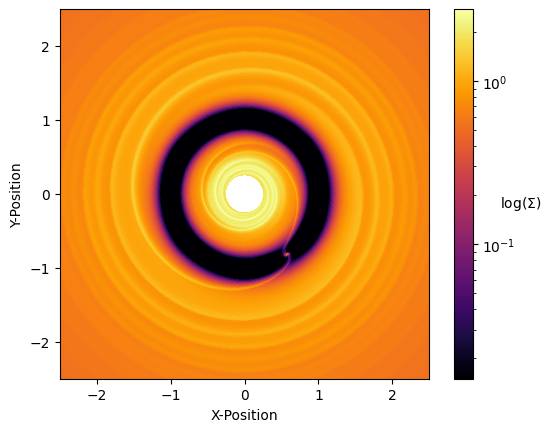

In [7]:
plt.pcolormesh(xp1, yp1, densp1, cmap='inferno', norm='log', vmin=0.015)
plt.xlabel('X-Position')
plt.ylabel('Y-Position')
plt.axis('square')
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.colorbar().set_label(r'log($\Sigma$)', rotation=0)

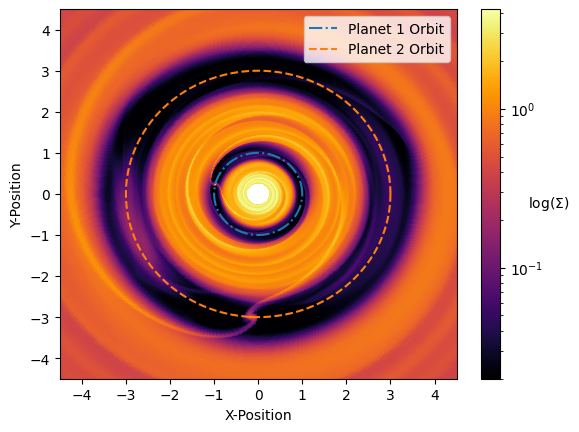

In [8]:
# Plot surface density
plt.pcolormesh(x, y, dens, cmap='inferno', norm='log', vmin= 0.02) 
plt.xlabel('X-Position')
plt.ylabel('Y-Position')
plt.xlim(-(p_r2 + 1.5), p_r2 + 1.5)
plt.ylim(-(p_r2 + 1.5), p_r2 + 1.5)
plt.colorbar().set_label(r'log($\Sigma$)', rotation=0)

# Plot orbits
theta = np.linspace(0, 2 * np.pi, 150)
a1 = p_r1 * np.cos(theta)
b1 = p_r1 * np.sin(theta)
a2 = (p_r2) * np.cos(theta)
b2 = (p_r2) * np.sin(theta)

plt.plot(a1, b1, linestyle='-.', label="Planet 1 Orbit")
plt.plot(a2, b2, linestyle='dashed', label="Planet 2 Orbit")
plt.legend()

In [9]:
thermal_mass = (0.05)**3
jupiter_mass = 0.000954588
saturn_mass = 0.000285716656
Q_j = (jupiter_mass/thermal_mass)
Q_s = (saturn_mass/thermal_mass)

def shock(j_r, s_r):
    l_sh_j = 0.93 * 0.05 * (j_r) ((1.66667 + 1) / (12/5) * (Q_j))**(-2/5)
    l_sh_s = 0.93 * 0.05*(s_r) * ((1.66667 + 1) / (12/5) * (Q_s))**(-2/5)
    return l_sh_j, l_sh_s

def horseshoe(j_r, s_r):
    x_j = 0.05 * (j_r)*((1.05 * Q_j**(1/2) + 3.4*Q_j**(7/3)) / (1 + 2*Q_j**(2)))
    x_s = 0.05 *(s_r)*((1.05 * Q_s**(1/2) + 3.4*Q_s**(7/3)) / (1 + 2*Q_s**(2)))
    return x_j, x_s

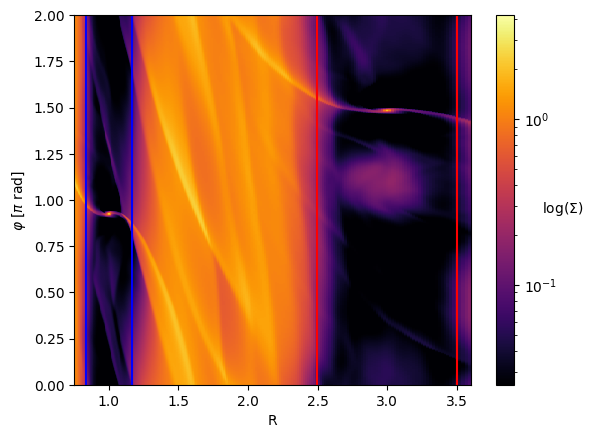

In [10]:
R, PHI = np.meshgrid(r_c, phi_c)
plt.pcolormesh(R, PHI/(np.pi), dens, norm='log', cmap='inferno', vmin=0.025)
plt.ylabel(r'$\varphi$ [$\pi$ rad]')
plt.xlabel('R')
plt.xlim(0.75,p_r2+horseshoe(p_r2,0)[0]+0.1)
plt.colorbar().set_label(r'log($\Sigma$)', rotation=0)


plt.vlines(p_r1 - horseshoe(p_r1,0)[0],0,2, color='blue')
plt.vlines(p_r1 + horseshoe(p_r1,0)[0] - 0.0025,0,2, color='blue')
plt.vlines(p_r2 - horseshoe(p_r2,0)[0], 0,2, color='red')
plt.vlines(p_r2 + horseshoe(p_r2,0)[0],0,2, color='red')

In [11]:
'''plt.figure(figsize=(13,6))

plt.subplot(231)
plt.plot(timep1, sum_torquep1)
plt.xlabel('Number of Orbits')
plt.ylabel(r'Total Torque [$\Gamma$]')
plt.title('Planet 1 [One Planet Simulation]')

plt.subplot(232)
plt.plot(time, sum_torque)
plt.xlabel('Number of Orbits')
plt.ylabel(r'Total Torque [$\Gamma$]')
plt.title('Planet 1')

plt.subplot(233)
plt.plot(time, sum_torque2)
plt.xlabel('Number of Orbits')
plt.ylabel(r'Total Torque [$\Gamma$]')
plt.title('Planet 2')

plt.subplot(234)
torque_integralp1 = np.cumsum(sum_torquep1 * 0.5)
plt.plot(timep1, torque_integralp1)
plt.ylabel(r'$\int \Gamma \, dt$')
plt.xlabel('Number of Orbits')
plt.title('Planet 1 [One Planet Simulation]')
m,b = np.polyfit(timep1, torque_integralp1, deg=1)
plt.plot(timep1, m*(timep1)+b, label=f'{np.round(m,5)}*x + {np.round(b,5)}')
plt.legend()

plt.subplot(235)
torque_integral = np.cumsum(sum_torque * 0.5)
plt.plot(time[5042:-1], torque_integral[5042:-1])
plt.ylabel(r'$\int \Gamma \, dt$')
plt.xlabel('Number of Orbits')
plt.title('Planet 1')
m,b = np.polyfit(time[5042:-1], torque_integral[5042:-1], deg=1)
plt.plot(time[5042:-1], m*(time[5042:-1])+b, label=f'{np.round(m,5)}*x + {np.round(b,5)}')
plt.legend()

plt.subplot(236)
torque_integral2 = np.cumsum(sum_torque2 * 0.5)
plt.plot(time[5042:-1], torque_integral2[5042:-1])
plt.ylabel(r'$\int \Gamma \, dt$')
plt.xlabel('Number of Orbits')
plt.title('Planet 2')
m2,b2 = np.polyfit(time[5042:-1], torque_integral2[5042:-1], deg=1)
plt.plot(time[5042:-1], m2*(time[5042:-1])+b2, label=f'{np.round(m2,5)}*x + {np.round(b2,5)}')
plt.legend()

plt.tight_layout()'''

"plt.figure(figsize=(13,6))\n\nplt.subplot(231)\nplt.plot(timep1, sum_torquep1)\nplt.xlabel('Number of Orbits')\nplt.ylabel(r'Total Torque [$\\Gamma$]')\nplt.title('Planet 1 [One Planet Simulation]')\n\nplt.subplot(232)\nplt.plot(time, sum_torque)\nplt.xlabel('Number of Orbits')\nplt.ylabel(r'Total Torque [$\\Gamma$]')\nplt.title('Planet 1')\n\nplt.subplot(233)\nplt.plot(time, sum_torque2)\nplt.xlabel('Number of Orbits')\nplt.ylabel(r'Total Torque [$\\Gamma$]')\nplt.title('Planet 2')\n\nplt.subplot(234)\ntorque_integralp1 = np.cumsum(sum_torquep1 * 0.5)\nplt.plot(timep1, torque_integralp1)\nplt.ylabel(r'$\\int \\Gamma \\, dt$')\nplt.xlabel('Number of Orbits')\nplt.title('Planet 1 [One Planet Simulation]')\nm,b = np.polyfit(timep1, torque_integralp1, deg=1)\nplt.plot(timep1, m*(timep1)+b, label=f'{np.round(m,5)}*x + {np.round(b,5)}')\nplt.legend()\n\nplt.subplot(235)\ntorque_integral = np.cumsum(sum_torque * 0.5)\nplt.plot(time[5042:-1], torque_integral[5042:-1])\nplt.ylabel(r'$\\int \\

Total Torque:
$$\Gamma = \iint_{S} \vec{r} \times \vec{g} \, dm \Rightarrow \iint_{S} \Sigma (r, \phi) |\vec{r}| |\vec{g}| \sin\theta \, dA \Rightarrow \iint_{S} \Sigma (r, \phi) r^2 |\vec{g}| \sin\theta \, dr d\phi$$
$$\Gamma_{\Sigma} = \Sigma (r, \phi) |\vec{g}| \sin\theta$$

Torque per unit radius:
$$\frac{\partial \Gamma}{\partial r} = r^2 \int \Sigma (r, \phi) |\vec{g}| \sin\theta \, d\phi \Rightarrow r^2 \int \Gamma_{\Sigma} \, d\phi$$

Torque per unit mass:
$$\frac{dm}{dr} = 2 \pi r \Sigma(r)$$
$$\frac{\partial \Gamma}{\partial m} = \frac{\partial \Gamma}{\partial r} / \frac{dm}{dr}$$ 
$$\frac{\partial \Gamma}{\partial m} = \frac{r}{2 \pi \Sigma(r)} \int \Sigma (r, \phi) |\vec{g}| \sin\theta \, d\phi $$

$$\Gamma = \int \frac{\partial \Gamma}{\partial r} \, dr$$

Torque per unit mass:
$$\frac{dm}{dr} = 2 \pi r \Sigma(r)$$
$$\frac{\partial \Gamma}{\partial m} = \frac{\partial \Gamma}{\partial r} / \frac{dm}{dr}$$ 
$$\frac{\partial \Gamma}{\partial m} = \frac{r}{2 \pi \Sigma(r)} \int \Sigma (r, \phi) |\vec{g}| \sin\theta \, d\phi $$

In [11]:
def initial(r, phi, time2, rp, gm_planet, gm_planet2):
    epsilon = 0.3
    gm0 = 1.0
    R_H = rp*np.cbrt(gm_planet/(3*gm0))
    period = 2*np.pi* np.sqrt(rp**3 / (gm0+gm_planet+gm_planet2))
    phip = 2 * (np.pi / period) * time2
    d = np.sqrt(pow(rp,2) + pow(r,2) - 2*rp*r*np.cos(phi - phip))
    g_mag = -1*((gm_planet*d) / (np.sqrt(pow(pow(d,2) + pow(epsilon,2)*pow(R_H,2), 3))))
    sine_term = (r*rp*np.cos(phi)*np.sin(phip) - r*rp*np.sin(phi)*np.cos(phip)) / (r*d)
    return g_mag, sine_term, d, R_H

In [12]:
'''Planet 1 One-Planet Simulation'''
sum_r_torque = 0
sum_r_torque_dm = 0
for i in range(600,800,1):
    data = athena_read.athdf(f'/home/sudat/cca/fixed/single_fixed/disk.out1.00{i}.athdf')
    dens = data.get('dens')[0]
    r = data.get('x1v')
    phi = data.get('x2v')
    time2 = data.get('Time')
    d_phi= data.get('x2f')
    d_r = data.get('x1f')

    phi = phi[:,None]
    d_phi = d_phi[:, None]
    d_phi = d_phi[1:] - d_phi[:-1]
    d_r = d_r[1:] - d_r[:-1]

    g_mag = initial(r, phi, time2, p_r1, jupiter_mass,0)[0]
    sine_term = initial(r, phi, time2, p_r1, jupiter_mass,0)[1]
    #d = initial(r, phi, time2, 1, 0.000954588)[2]
    #dens[d<0.5*initial(r, phi, time2, 1, 0.000954588)[3]] = 0
 
    sum_r_torque += r**2*np.sum(dens * g_mag * sine_term * d_phi, axis=0)
    sum_r_torque_dm += (r / (2 * np.pi * np.average(dens, axis=0))) * np.sum(dens * g_mag * sine_term * d_phi, axis=0)

r_torque_avgp1 = sum_r_torque/len(range(600,800,1))
r_torque_dm = sum_r_torque_dm/len(range(600,800,1))

In [13]:
'''Planet 1 Two-Planet Simulation'''
sum_r_torque = 0
sum_r_torque_dm = 0
for i in range(600,800,1):
    data = athena_read.athdf(f'/home/sudat/cca/fixed/jupiter-jupiter/a3_fixed/disk.out1.00{i}.athdf')
    dens = data.get('dens')[0]
    r = data.get('x1v')
    phi = data.get('x2v')
    time2 = data.get('Time')
    d_phi= data.get('x2f')
    d_r = data.get('x1f')

    phi = phi[:,None]
    d_phi = d_phi[:, None]
    d_phi = d_phi[1:] - d_phi[:-1]
    d_r = d_r[1:] - d_r[:-1]

    g_mag = initial(r, phi, time2, p_r1, jupiter_mass,0)[0]
    sine_term = initial(r, phi, time2, p_r1, jupiter_mass,0)[1]
    #d = initial(r, phi, time2, 1, 0.000954588)[2]
    #dens[d<0.5*initial(r, phi, time2, 1, 0.000954588)[3]] = 0
 
    sum_r_torque += r**2*np.sum(dens * g_mag * sine_term * d_phi, axis=0)
    sum_r_torque_dm += (r / (2 * np.pi * np.average(dens, axis=0))) * np.sum(dens * g_mag * sine_term * d_phi, axis=0)

r_torque_avg_p1 = sum_r_torque/len(range(600,800,1))
r_torque_dmp1 = sum_r_torque_dm/len(range(600,800,1))

In [14]:
'''Planet 2'''
sum_r_torque = 0
for i in range(600,800,1):
    data = athena_read.athdf(f'/home/sudat/cca/fixed/jupiter-jupiter/a3_fixed/disk.out1.00{i}.athdf')
    dens = data.get('dens')[0]
    r = data.get('x1v')
    phi = data.get('x2v')
    time2 = data.get('Time')
    d_phi= data.get('x2f')
    d_r = data.get('x1f')

    phi = phi[:,None]
    d_phi = d_phi[:, None]
    d_phi = d_phi[1:] - d_phi[:-1]
    d_r = d_r[1:] - d_r[:-1]

    g_mag = initial(r, phi, time2, p_r2, jupiter_mass, jupiter_mass)[0]
    sine_term = initial(r, phi, time2, p_r2, jupiter_mass, jupiter_mass)[1]
    #d = initial(r, phi, time2, 1.5, 0.000954588)[2]
    #dens[d<0.5*initial(r, phi, time2, 1.5, 0.000954588)[3]] = 0
    sum_r_torque += r**2*np.sum(dens * g_mag * sine_term * d_phi, axis=0)
    sum_r_torque_dm += (r / (2 * np.pi * np.average(dens, axis=0))) * np.sum(dens * g_mag * sine_term * d_phi, axis=0)

r_torque_avg_p2 = sum_r_torque / len(range(600,800,1))
r_torque_dmp2 = sum_r_torque_dm/len(range(600,800,1))

$$\frac{\partial \Gamma_{\nu}}{\partial r} = 3 \pi \nu \Sigma r^2 \Omega$$

In [15]:
GM = 1.0
keplerian_vel = np.sqrt(GM / r**3)
nu = 0.001 * (0.05*r)**2 * keplerian_vel
density_initial = (r)**(-1/2)
viscous_torque = 3 * np.pi * nu * density_initial * r**2 * keplerian_vel

In [16]:
sum_dens_onesim = 0
for i in range(600,800,10):
    data = athena_read.athdf(f'/home/sudat/cca/fixed/single_fixed/disk.out1.00{i}.athdf')
    density = data.get('dens')[0]
    #d = initial(data.get('x1v'), data.get('x2v')[:,None], data.get('Time'), 1.0, 0.000954588, 0.000954588)[2]
    #density[d < 0.45 * initial(data.get('x1v'), data.get('x2v')[:,None], data.get('Time'), 1.0, 0.000954588,0.000954588)[3]] = 0
    sum_dens_onesim += density

sum_dens_avg_onesim = sum_dens_onesim/len(range(600,800,10))

In [17]:
sum_dens = 0
for i in range(600,800,10):
    data = athena_read.athdf(f'/home/sudat/cca/fixed/jupiter-jupiter/a2d5_fixed/disk.out1.00{i}.athdf')
    density = data.get('dens')[0]
    #d = initial(data.get('x1v'), data.get('x2v')[:,None], data.get('Time'), 1.5, 0.000954588)[2]
    #density[d < 1.0 * initial(data.get('x1v'), data.get('x2v')[:,None], data.get('Time'), 1.5, 0.000954588)[3]] = 0.004
    #d = initial(data.get('x1v'), data.get('x2v')[:,None], data.get('Time'), 1.0, 0.000954588)[2]
    #density[d < 1.0 * initial(data.get('x1v'), data.get('x2v')[:,None], data.get('Time'), 1.0, 0.000954588)[3]] = 0.004
    sum_dens += density

sum_dens_avg = sum_dens/len(range(600,800,10))

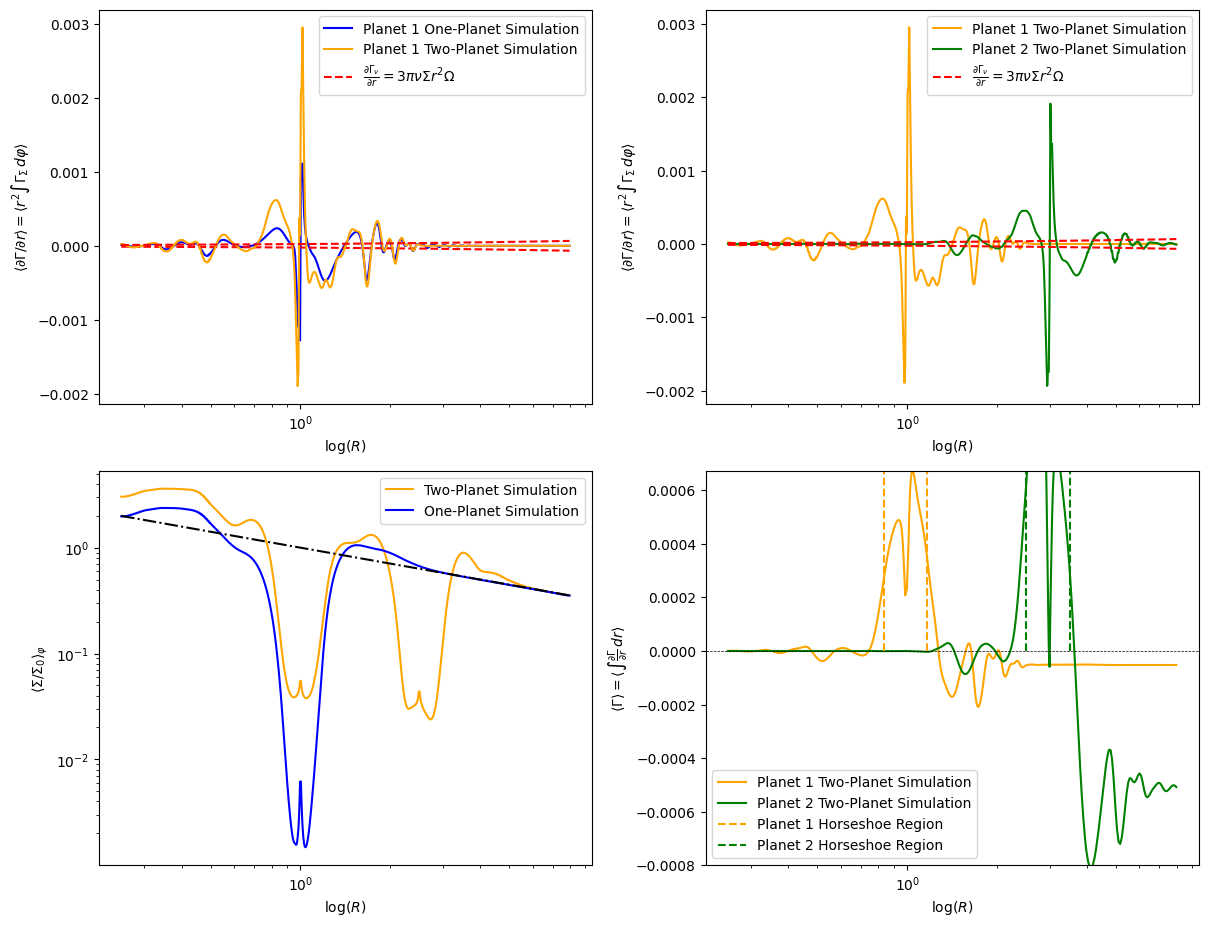

In [18]:
plt.figure(figsize=(9.75*1.25,7.5*1.25))

plt.subplot(221)
plt.plot(rp1, (r_torque_avgp1), label= 'Planet 1 One-Planet Simulation', color='blue')
plt.plot(r, -1*(viscous_torque), color='red', linestyle='dashed', linewidth=1.5)
plt.plot(r, (r_torque_avg_p1), label='Planet 1 Two-Planet Simulation', color='orange')
plt.plot(r, (viscous_torque), color='red', label = r'$\frac{\partial \Gamma_\nu}{\partial r} = 3 \pi \nu \Sigma r^2 \Omega$', linestyle='dashed', linewidth=1.5)
plt.xlabel(r'log($R$)')
plt.xscale('log')

plt.ylabel(r'$\langle {\partial \Gamma} / {\partial r} \rangle = \langle r^2 \int \Gamma_{\Sigma} \, d\varphi \rangle$')
plt.legend()

plt.subplot(222)
plt.plot(r, (r_torque_avg_p1), label='Planet 1 Two-Planet Simulation', color='orange')
plt.plot(r, (r_torque_avg_p2), label= 'Planet 2 Two-Planet Simulation', color='green')
plt.plot(r, (viscous_torque), color='red', label = r'$\frac{\partial \Gamma_\nu}{\partial r} = 3 \pi \nu \Sigma r^2 \Omega$', linestyle='dashed', linewidth=1.5)
plt.plot(r, -1*(viscous_torque), color='red', linestyle='dashed', linewidth=1.5)
plt.xlabel(r'log($R$)')
plt.xscale('log')

plt.ylabel(r'$\langle {\partial \Gamma} / {\partial r} \rangle = \langle r^2 \int \Gamma_{\Sigma} \, d\varphi \rangle$')
plt.legend()

plt.subplot(223)
plt.plot(r, np.average(sum_dens_avg, axis = 0), label = 'Two-Planet Simulation', color='orange')
plt.plot(rp1, np.average(sum_dens_avg_onesim, axis = 0), label= 'One-Planet Simulation', color='blue')
plt.plot(r, (r)**(-1/2), linestyle= '-.', c='black')
#plt.text(5, 0.335, r'$\Sigma = \Sigma_0 (\frac{r}{r_p})^{- 0.5}$')
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\langle {\Sigma}/{\Sigma_{0}}\rangle_{\varphi}$')
plt.xlabel(r'log($R$)')

plt.legend()

plt.subplot(224)   
#plt.plot(rp1, 2*np.pi*(np.cumsum(r_torque_avgp1 * d_rp1)), label='Planet 1 One-Planet Simulation', color='blue')
plt.plot(r, 2*np.pi*(np.cumsum(r_torque_avg_p1 * d_r)), label='Planet 1 Two-Planet Simulation', color='orange')
plt.plot(r, 2*np.pi*(np.cumsum(r_torque_avg_p2* d_r)), label='Planet 2 Two-Planet Simulation', color='green')
plt.axhline(y=0, linestyle='dashed', color='black', linewidth=0.5)
plt.ylabel(r'$\langle \Gamma \rangle = \langle \int \frac{\partial \Gamma}{\partial r} \, dr \rangle$')
plt.xlabel(r'log($R$)')
plt.xscale('log')
plt.ylim(-0.0008,np.max(2*np.pi*(np.cumsum(r_torque_avg_p1 * d_r))))
plt.vlines(p_r1 - horseshoe(p_r1,0)[0],0,np.max(2*np.pi*(np.cumsum(r_torque_avg_p1 * d_r))), linestyle='dashed', color='orange', label= "Planet 1 Horseshoe Region")
plt.vlines(p_r1 + horseshoe(p_r1,0)[0] - 0.0025,0,np.max(2*np.pi*(np.cumsum(r_torque_avg_p1 * d_r))), linestyle='dashed',color='orange')
plt.vlines(p_r2 - horseshoe(p_r2, 0)[0], 0,np.max(2*np.pi*(np.cumsum(r_torque_avg_p1 * d_r))), linestyle='dashed',color='green',label="Planet 2 Horseshoe Region")
plt.vlines(p_r2 + horseshoe(p_r2, 0)[0],0,np.max(2*np.pi*(np.cumsum(r_torque_avg_p1 * d_r))), linestyle='dashed',color='green')

plt.legend(loc='lower left')

plt.tight_layout()

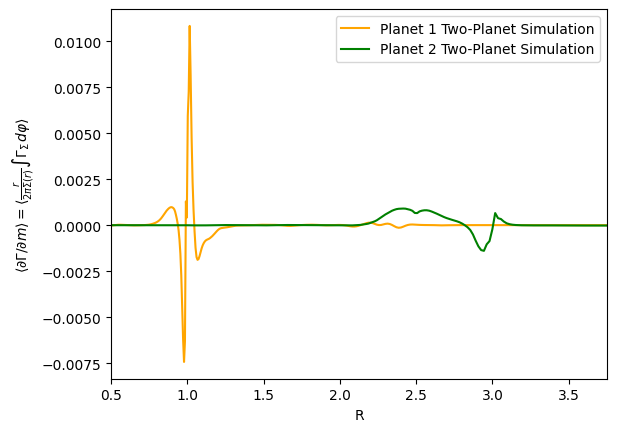

In [19]:
plt.plot(r, (r_torque_avg_p1)/ ( 2 * np.pi * r * np.average(sum_dens_avg, axis = 0)), label='Planet 1 Two-Planet Simulation', color='orange')
plt.plot(r, (r_torque_avg_p2)/ ( 2 * np.pi * r * np.average(sum_dens_avg, axis = 0)), label= 'Planet 2 Two-Planet Simulation', color='green')
plt.xlabel(r'R')
plt.xlim(0.5,p_r2+horseshoe(p_r2,0)[0]+0.25)

plt.ylabel(r'$\langle {\partial \Gamma} / {\partial m} \rangle = \langle \frac{r}{2 \pi \Sigma(r)} \int \Gamma_{\Sigma} \, d\varphi \rangle$')
plt.legend()

In [20]:
total_p1 = 2*np.pi*(np.cumsum(r_torque_avg_p1 * d_r))
total_p2 = 2*np.pi*(np.cumsum(r_torque_avg_p2* d_r))
inner_index1 = np.where(r < p_r1 - horseshoe(p_r1,0)[0])[-1][-1]
outer_index1 = np.where(r > p_r1 + horseshoe(p_r1,0)[0])[0][0]
inner_index2 = np.where(r < p_r2 - horseshoe(p_r2,0)[0])[-1][-1]
outer_index2 = np.where(r > p_r2 + horseshoe(p_r2,0)[0])[0][0]

temp1 = np.array([])
temp2 = np.array([])
for i in range(0, int((inner_index1/2))):
    if total_p1[i] < total_p1[0]*1.25 and total_p1[i] > total_p1[0]*0.75:
        temp1 = np.append(temp1, total_p1[i])
start1 = np.average(temp1)
for i in range(int(outer_index1/2), len(total_p1)):
    if np.abs(total_p1[i]) < np.abs(total_p1[-1]*1.25) and np.abs(total_p1[i]) > np.abs(total_p1[-1]*0.75):
        temp2 = np.append(temp2, total_p1[i])
end1 = np.average(temp2)

temp3 = np.array([])
temp4 = np.array([])
for i in range(0, int((inner_index2/2))):
    if total_p2[i] < total_p2[0]*1.25 and total_p2[i] > total_p2[0]*0.75:
        temp3 = np.append(temp3, total_p2[i])
start2 = np.average(temp3)
for i in range(int(outer_index2/2), len(total_p2)):
    if np.abs(total_p2[i]) < np.abs(total_p2[-1]*1.25) and np.abs(total_p2[i]) > np.abs(total_p2[-1]*0.75):
        temp4 = np.append(temp4, total_p2[i])
end2 = np.average(temp4)

In [21]:
print(f'Inner Lindblad Torque Planet 1: {np.round((total_p1[inner_index1] - start1),5)}')
print(f'Outer Lindblad Torque Planet 1: {np.round((end1 - total_p1[outer_index1]),5)} ')
print(f'Horseshoe Drag Planet 1: {np.round((total_p1[outer_index1] - total_p1[inner_index1]), 5)}')

print(f'Inner Lindblad Torque Planet 2: {np.round((total_p2[inner_index2] - start1),5)}')
print(f'Outer Lindblad Torque Planet 2: {np.round((end2 - total_p2[outer_index2]),5)} ')
print(f'Horseshoe Drag Planet 2: {np.round((total_p2[outer_index2] - total_p2[inner_index2]), 5)}')

Inner Lindblad Torque Planet 1: 0.00024
Outer Lindblad Torque Planet 1: -0.00038 
Horseshoe Drag Planet 1: 9e-05
Inner Lindblad Torque Planet 2: 0.00059
Outer Lindblad Torque Planet 2: -0.00064 
Horseshoe Drag Planet 2: -0.00029


$$\frac{\Delta_{gap}}{R_p} = 0.41 (\frac{M_p}{M_{*}})^{1/2} (\frac{h_p}{R_p})^{-3/4} \alpha^{-1/4}$$

1 gap width + orbital separation

In [10]:
inner1 = np.array([0.00013, 0.00018, 0.00016, 0.00018, 0.00024, 0.00028, 0.00027, 0.00024])
outer1 = np.array([-4.0e-5, -4.0e-5, -6.0e-5, -2.0e-5, -5.0e-5, -0.00027, -0.00040, -0.00038])
h1     = np.array([-6.0e-5, -4.0e-5, 2.0e-5, 2.0e-5, 1.0e-5, 2.0e-5, -6.0e-15, 9.0e-5])

inner2 = np.array([3.0e-5, 3.0e-5,     0.0,      0.0,     5.0e-5, 0.00021, 0.00047, 0.00059])
outer2 = np.array([-0.00038, -0.00036, -0.00055, -0.00059, -0.00065, -0.00072, -0.00067, -0.00064])
h2     = np.array([-1.0e-5, 2.0e-5, -0.00014, -0.00018, -0.00016, -0.00027, -0.00016, -0.00029])

separation = np.array([1.2, np.cbrt(2.25), 1.5, np.cbrt(4.0), 1.75, 2.0, 2.5, 3.0])

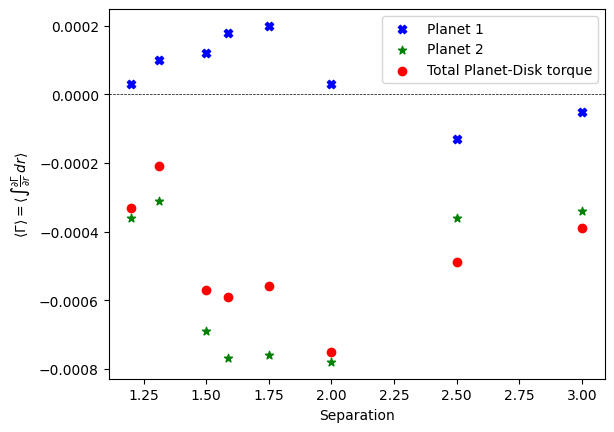

In [11]:
plt.scatter(separation, inner1 + h1 + (outer1), label='Planet 1', color='blue', marker='X')
plt.scatter(separation, inner2 + h2 + (outer2), label='Planet 2', color='green', marker='*')
plt.scatter(separation, (inner1 + h1 + (outer1)) + (inner2 + h2 + (outer2)), label='Total Planet-Disk torque', color='red', marker='o')
plt.axhline(y=0, linestyle='dashed', color='black', linewidth=0.5)

plt.xlabel('Separation')
plt.ylabel(r'$\langle \Gamma \rangle = \langle \int \frac{\partial \Gamma}{\partial r} \, dr \rangle$')

plt.legend()

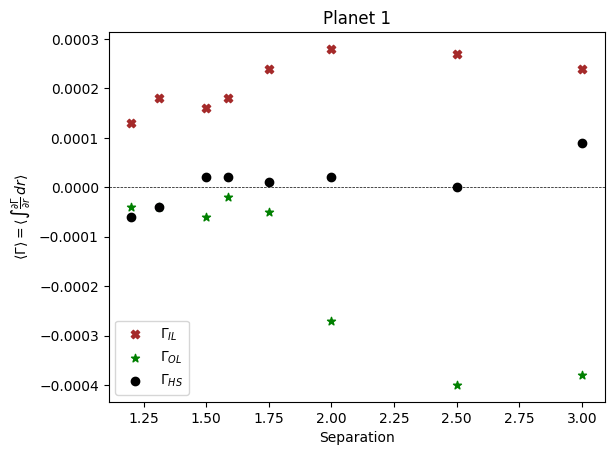

In [13]:
plt.scatter(separation, inner1, label=r'$\Gamma_{IL}$', color='brown', marker='X')
plt.scatter(separation, outer1, label=r'$\Gamma_{OL}$',  color='green', marker='*')
plt.scatter(separation, h1, label=r'$\Gamma_{HS}$', color='black', marker='o')
plt.axhline(y=0, linestyle='dashed', color='black', linewidth=0.5)

plt.xlabel('Separation')
plt.ylabel(r'$\langle \Gamma \rangle = \langle \int \frac{\partial \Gamma}{\partial r} \, dr \rangle$')
plt.title('Planet 1')

plt.legend()

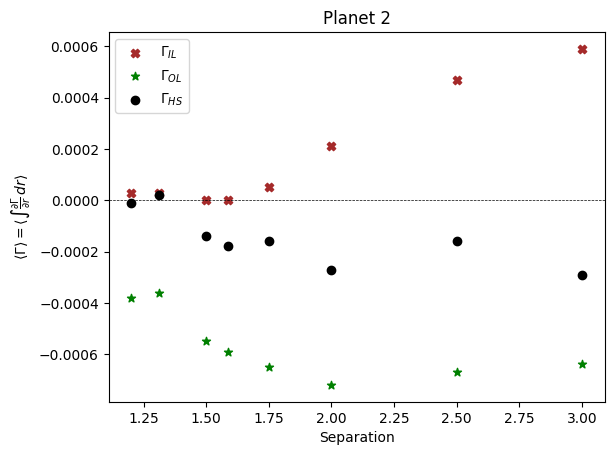

In [6]:
plt.scatter(separation, inner2, label=r'$\Gamma_{IL}$', color='brown', marker='X')
plt.scatter(separation, outer2, label=r'$\Gamma_{OL}$',  color='green', marker='*')
plt.scatter(separation, h2, label=r'$\Gamma_{HS}$', color='black', marker='o')
plt.axhline(y=0, linestyle='dashed', color='black', linewidth=0.5)

plt.xlabel('Separation')
plt.ylabel(r'$\langle \Gamma \rangle = \langle \int \frac{\partial \Gamma}{\partial r} \, dr \rangle$')
plt.title('Planet 2')

plt.legend()